# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
%matplotlib inline



# Loading Data and preprocessing

In [2]:
data=pd.read_csv('E:\credit\credit scoring\CreditScoring.csv')

In [3]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
#convert the numerical values to what they represent
status_values ={
    0:'unk',
    1:'ok',
    2:'default'
    
}
data.status = data.status.map(status_values)
data

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,ok,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,default,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,ok,0,1,48,23,1,1,3,49,140,0,0,550,550


In [7]:
home_values={
    0:'Unk',
    1:'rent',
    2:'owner',
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other' 
}
data.home = data.home.map(home_values)
marital_values={
    0:'Unk',
    1:'single',
    2:'married',
    3:'widow',
    4:'separated',
    5:'divorced'
}
data.marital = data.marital.map(marital_values)
records_values={
    0:'Unk',
    1:'yes',
    2:'no'

}
data.records = data.records.map(records_values)
job_values={
    0:'Unk',
    1:'fixed',
    2:'partime',
    3:'freelance',
    4:'others',
    
}
data.job = data.job.map(job_values)

In [8]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,yes,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,yes,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,no,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,yes,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,yes,fixed,46,107,0,0,310,910


In [9]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [11]:
 # we see there are some 99999 values in max row. this means these columns have non values
for i in ['income','assets','debt']:
    data[i]=data[i].replace(to_replace=99999999, value=np.nan)

In [12]:
data.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [13]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
#look for target variable'status'
data.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [15]:
#lets remove one unknown  values it is not for our datasets 
data=data[data['status']!='unk']

In [16]:
#lets splits data into train , test, validatin sets
data_train_full, data_test = train_test_split(data,test_size=0.2, random_state=2)
data_train, data_val =train_test_split(data_train_full,test_size=0.25, random_state=2)

In [17]:
print((len(data_train),len(data_val),len(data_test)))

(2672, 891, 891)


In [18]:
y_train = (data_train.status=='default').values
y_val =(data_val.status=='default').values
del(data_train['status'])
del(data_val['status'])

In [19]:
#prepare for X ,first we fill null values in columns
data_train= data_train.fillna(0)
data_val= data_val.fillna(0)

In [20]:
#do one hot encoding to our categorical variables
train_dict= data_train.to_dict('records')
val_dict = data_val.to_dict('records')
train_dict[0]

{'seniority': 0,
 'home': 'rent',
 'time': 60,
 'age': 27,
 'marital': 'married',
 'records': 'yes',
 'job': 'fixed',
 'expenses': 58,
 'income': 133.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 400,
 'price': 1136}

In [21]:
#use list of dictonaries to use in dictvectorzier
dv = DictVectorizer(sparse = False)
x_train = dv.fit_transform(train_dict)
x_val = dv.transform(val_dict)

# Decision Tree Classifier

In [22]:
dt= DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [23]:
# calculate auc score to evaluate model
y_pred = dt.predict_proba(x_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

In [24]:
y_pred = dt.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)

0.6359045471169085

In [25]:
# the auc score fell to 65% while predicting validation set , it isa a case of overfitting

In [26]:
# lets max_depth of our decision tree to reduce its complexity
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [27]:
#visualize this tree
tree_text = export_text(dt, feature_names= dv.feature_names_)
print(tree_text)

|--- seniority <= 2.50
|   |--- job=fixed <= 0.50
|   |   |--- class: True
|   |--- job=fixed >  0.50
|   |   |--- class: False
|--- seniority >  2.50
|   |--- records=no <= 0.50
|   |   |--- class: False
|   |--- records=no >  0.50
|   |   |--- class: False



In [28]:
#lets see auc score
y_pred = dt.predict_proba(x_train)[:,1]
auc_train = roc_auc_score(y_train,y_pred)
y_pred = dt.predict_proba(x_val)[:,1]
auc_val= roc_auc_score(y_val,y_pred)
print(f'train auc score:{auc_train}\n validation auc score:{auc_val}')

train auc score:0.7196853699496197
 validation auc score:0.726276971839571


In [29]:
#here the train auc score dropped but validation auc score increased , this means 
# model isnot overfitting tha data

In [30]:
# lets see from othe depths
for a in [1,2,3,4,5,6,7,8,9,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth =a)
    dt.fit(x_train, y_train)
    y_pred = dt.predict_proba(x_val)[:,1]
    auc =roc_auc_score(y_val, y_pred)
    print(f'{a} ---> {auc}')
    
  

1 ---> 0.6442642935511398
2 ---> 0.726276971839571
3 ---> 0.7538004388638303
4 ---> 0.7618188467633792
5 ---> 0.7644794587346092
6 ---> 0.7552602706326952
7 ---> 0.7394246007558211
8 ---> 0.7062812385712545
9 ---> 0.7059642813604778
10 ---> 0.6732811166646349
15 ---> 0.6386291600633914
20 ---> 0.6581890771668901
None ---> 0.6260575399244179


In [31]:
# here we see best three value of depth are 3,4,5


# now check best value for parameters min_sample_leaf
for a in [3,4,5]:
    print('depth: %s' %a)
    for s in [1,5,10,15,20,50,100,200]:
        dt = DecisionTreeClassifier(max_depth =a, min_samples_leaf= s)
        dt.fit(x_train,y_train)
        y_pred = dt.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s---> %.3f' %(s,auc))
    print()

depth: 3
1---> 0.754
5---> 0.754
10---> 0.754
15---> 0.754
20---> 0.754
50---> 0.754
100---> 0.732
200---> 0.744

depth: 4
1---> 0.762
5---> 0.762
10---> 0.757
15---> 0.757
20---> 0.758
50---> 0.772
100---> 0.738
200---> 0.744

depth: 5
1---> 0.764
5---> 0.769
10---> 0.769
15---> 0.770
20---> 0.767
50---> 0.780
100---> 0.748
200---> 0.753



In [32]:
# here we got max auc score (78%) can be achieved by depth =5 and sample leaf = 50


In [33]:
dt = DecisionTreeClassifier(max_depth=5 , min_samples_leaf = 50)
dt.fit (x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

# Random Forest Classifier

In [34]:
rf= RandomForestClassifier(n_estimators = 10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [35]:
#evaluation
y_pred = rf.predict_proba(x_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7605693039132025

In [36]:
# auuc score = 79%  lets check for different values of n_estimators
aucc=[]
for n in range(10,201,10):
    rf= RandomForestClassifier(n_estimators=n, random_state=3)
    rf.fit(x_train,y_train)
    y_pred = rf.predict_proba(x_val)[:,1]
    auc= roc_auc_score(y_val, y_pred)
    aucc.append(auc)

Text(0, 0.5, 'AUCC')

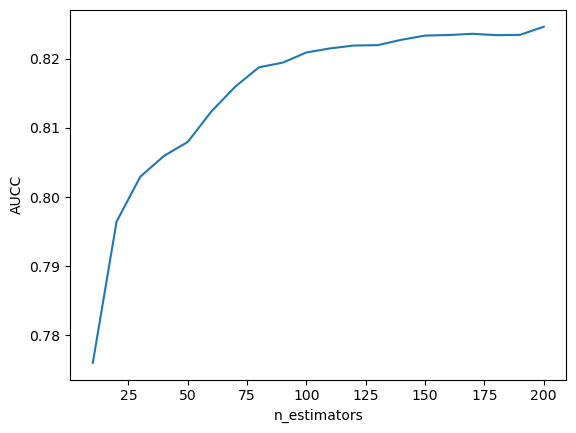

In [37]:
plt.plot(range(10,201,10),aucc)
plt.xlabel('n_estimators')
plt.ylabel('AUCC')

In [38]:
# lets see tune the value for other parameter in random forestclassifier
all_aucc = {}

for a in range(5, 10, 20):
    print('depth %s' % a)
    aucc = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=a, random_state=1)
        rf.fit(x_train, y_train)
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s ---> %.3f' % (i, auc))
        aucc.append(auc)

    all_aucc[a] = aucc
    print()

depth 5
10 ---> 0.825
20 ---> 0.829
30 ---> 0.830
40 ---> 0.833
50 ---> 0.833
60 ---> 0.834
70 ---> 0.836
80 ---> 0.836
90 ---> 0.835
100 ---> 0.836
110 ---> 0.836
120 ---> 0.835
130 ---> 0.835
140 ---> 0.834
150 ---> 0.835
160 ---> 0.835
170 ---> 0.835
180 ---> 0.836
190 ---> 0.836
200 ---> 0.837



In [39]:

all_aucc = {}

for a in range(5, 21, 5):  # Adjust the range based on your requirement
    print('depth %s' % a)
    aucc = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=a, random_state=1)
        rf.fit(x_train, y_train)
        y_pred = rf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s ---> %.3f' % (i, auc))
        aucc.append(auc)

    all_aucc[a] = aucc
    print()

depth 5
10 ---> 0.825
20 ---> 0.829
30 ---> 0.830
40 ---> 0.833
50 ---> 0.833
60 ---> 0.834
70 ---> 0.836
80 ---> 0.836
90 ---> 0.835
100 ---> 0.836
110 ---> 0.836
120 ---> 0.835
130 ---> 0.835
140 ---> 0.834
150 ---> 0.835
160 ---> 0.835
170 ---> 0.835
180 ---> 0.836
190 ---> 0.836
200 ---> 0.837

depth 10
10 ---> 0.826
20 ---> 0.828
30 ---> 0.832
40 ---> 0.834
50 ---> 0.831
60 ---> 0.832
70 ---> 0.833
80 ---> 0.832
90 ---> 0.833
100 ---> 0.832
110 ---> 0.832
120 ---> 0.832
130 ---> 0.833
140 ---> 0.832
150 ---> 0.832
160 ---> 0.833
170 ---> 0.832
180 ---> 0.832
190 ---> 0.832
200 ---> 0.832

depth 15
10 ---> 0.802
20 ---> 0.809
30 ---> 0.809
40 ---> 0.815
50 ---> 0.814
60 ---> 0.817
70 ---> 0.819
80 ---> 0.820
90 ---> 0.822
100 ---> 0.822
110 ---> 0.823
120 ---> 0.824
130 ---> 0.825
140 ---> 0.824
150 ---> 0.824
160 ---> 0.824
170 ---> 0.825
180 ---> 0.824
190 ---> 0.825
200 ---> 0.825

depth 20
10 ---> 0.784
20 ---> 0.815
30 ---> 0.815
40 ---> 0.819
50 ---> 0.821
60 ---> 0.823
70 --

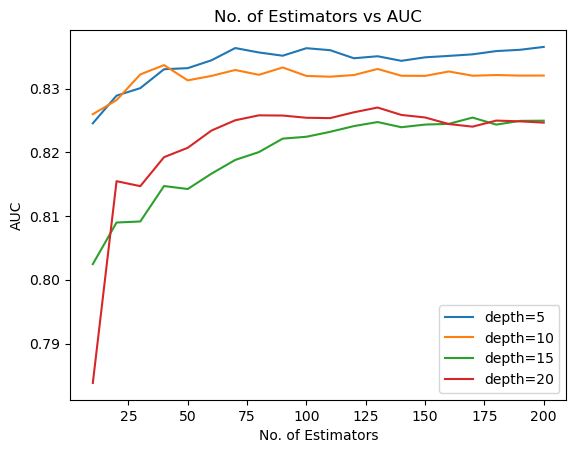

In [40]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucc[5],label = 'depth=5')
plt.plot(num_trees, all_aucc[10],label = 'depth=10')
plt.plot(num_trees, all_aucc[15],label = 'depth=15')
plt.plot(num_trees, all_aucc[20],label = 'depth=20')
plt.title('No. of Estimators vs AUC')
plt.xlabel('No. of Estimators')
plt.ylabel('AUC')
plt.legend()

In [41]:
# TUNE  min_samples_leaf
all_aucc ={}

for s in [3,5,10]:
    print('sample %s' %s)
    aucc=[]
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=s, random_state= 1)
        rf.fit(x_train, y_train)
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s---> %.3f' %(i,auc))
        aucc.append(auc)
        
    all_aucc[s]= aucc
    print()
        

sample 3
10---> 0.813
20---> 0.823
30---> 0.827
40---> 0.828
50---> 0.829
60---> 0.832
70---> 0.834
80---> 0.834
90---> 0.834
100---> 0.834
110---> 0.834
120---> 0.833
130---> 0.833
140---> 0.833
150---> 0.832
160---> 0.833
170---> 0.833
180---> 0.833
190---> 0.833
200---> 0.833

sample 5
10---> 0.829
20---> 0.830
30---> 0.830
40---> 0.833
50---> 0.833
60---> 0.834
70---> 0.835
80---> 0.834
90---> 0.835
100---> 0.835
110---> 0.836
120---> 0.836
130---> 0.837
140---> 0.837
150---> 0.836
160---> 0.837
170---> 0.837
180---> 0.837
190---> 0.837
200---> 0.837

sample 10
10---> 0.820
20---> 0.834
30---> 0.837
40---> 0.838
50---> 0.838
60---> 0.839
70---> 0.839
80---> 0.839
90---> 0.840
100---> 0.840
110---> 0.840
120---> 0.839
130---> 0.840
140---> 0.840
150---> 0.839
160---> 0.839
170---> 0.839
180---> 0.839
190---> 0.840
200---> 0.840



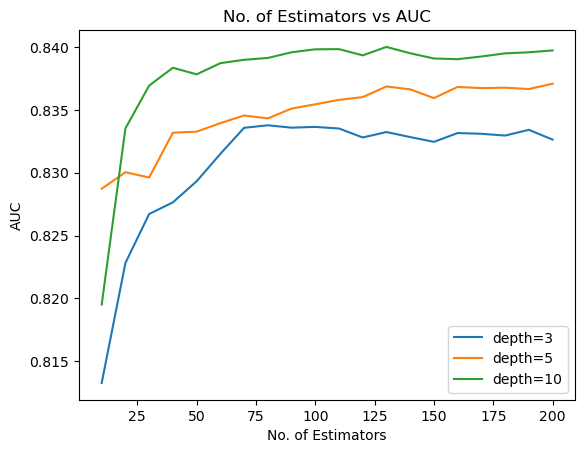

In [42]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucc[3],label = 'depth=3')
plt.plot(num_trees, all_aucc[5],label = 'depth=5')
plt.plot(num_trees, all_aucc[10],label = 'depth=10')
plt.title('No. of Estimators vs AUC')
plt.xlabel('No. of Estimators')
plt.ylabel('AUC')
plt.legend()

In [43]:
rf = RandomForestClassifier(n_estimators = 200, max_depth=10 , min_samples_leaf = 10, random_state= 1)
rf.fit (x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=1)

# Gradient Boosting

In [44]:
# we need to convert our train and val Dmatrix, a speacial datatype are used to give input to xgboost
dtrain = xgb.DMatrix(x_train, label= y_train, feature_names= dv.feature_names_)
dval = xgb.DMatrix(x_val, label =y_val, feature_names= dv.feature_names_)

In [45]:
#look for parameter of xgb
xgbparams = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight': 1,
    'objective':'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity': 1
}

In [46]:
#train our xgb mdel
model = xgb.train(xgbparams, dtrain, num_boost_round=10)

In [47]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.28043777, 0.24380125, 0.26210544, 0.95552224, 0.56928545,
       0.24700896, 0.09100986, 0.16160275, 0.0702864 , 0.23438549],
      dtype=float32)

In [48]:
roc_auc_score(y_val, y_pred)

0.8150128001950506

In [49]:
# its good rslt but slightly worse than random forest

# Evaluation

In [50]:
watchlist= [(dtrain,'train'),(dval,'val')]
xgbparams = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity': 1
}


In [51]:
#train the model
model = xgb.train(xgbparams, dtrain, num_boost_round= 100, evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86337	val-auc:0.75843
[10]	train-auc:0.95617	val-auc:0.81365
[20]	train-auc:0.97599	val-auc:0.81353
[30]	train-auc:0.98541	val-auc:0.81468
[40]	train-auc:0.99194	val-auc:0.81180
[50]	train-auc:0.99687	val-auc:0.80830
[60]	train-auc:0.99890	val-auc:0.80824
[70]	train-auc:0.99964	val-auc:0.80805
[80]	train-auc:0.99991	val-auc:0.80920
[90]	train-auc:0.99998	val-auc:0.80790
[99]	train-auc:1.00000	val-auc:0.80760


In [52]:
train_auc = [0.86337,0.95617,0.97599,0.98541,0.99194,0.99687,0.99890,0.99964,0.99991,0.99998,1.00000]
val_auc = [0.75843,0.81365,0.81353,0.81468,0.81180,0.80830,0.80824,0.80805,0.80920,0.80790,0.80760]


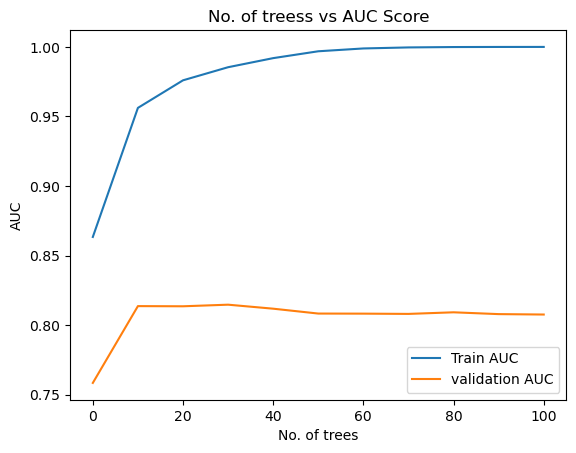

In [53]:
num_trees = np.arange(0,101,10)
plt.plot(num_trees, train_auc,label = 'Train AUC')
plt.plot(num_trees, val_auc ,label = 'validation AUC')
plt.title('No. of treess vs AUC Score')
plt.xlabel('No. of trees')
plt.ylabel('AUC')
plt.legend()

In [54]:
# as no. of trees increases the auc for training set also increases becoz each new tree learns 
# from the mistakes of previous tree but in valodation set for first 15 trees the auc increases but after that it doesnot change much it is overfitting


# parameter tuning 

[0]	train-auc:0.86337	val-auc:0.75843
[200]	train-auc:1.00000	val-auc:0.80641
[400]	train-auc:1.00000	val-auc:0.80579
[499]	train-auc:1.00000	val-auc:0.80592
[0]	train-auc:0.86337	val-auc:0.75843
[200]	train-auc:0.98803	val-auc:0.82093
[400]	train-auc:0.99821	val-auc:0.81438
[499]	train-auc:0.99949	val-auc:0.81260


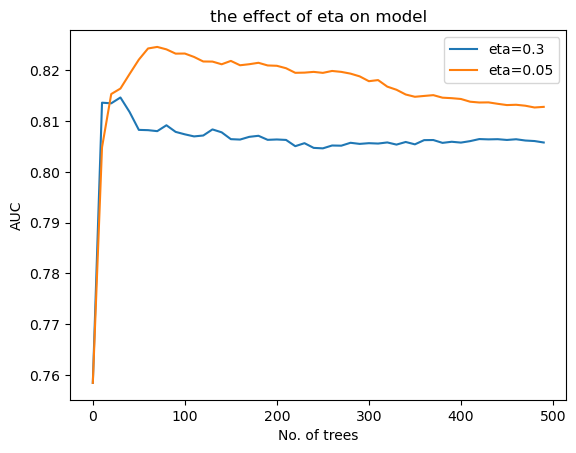

In [55]:
#need to change 'eta' parameter as our  dataset is small, the eta value should be 0.1
save = {}
model = xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=200,evals= watchlist,evals_result= save)
num_trees = np.arange(0,500,10)
fig, ax = plt.subplots()
plt.plot(num_trees, save['val']['auc'][::10], label ='eta=0.3')


xgbparams = {
    'eta': 0.05,
    'max_depth':6,
    'min_child_weight': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity': 1
}


model = xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=200,evals= watchlist,evals_result= save)

plt.plot(num_trees, save['val']['auc'][::10],label ='eta=0.05')
plt.title('the effect of eta on model')
plt.xlabel('No. of trees')
plt.ylabel('AUC')
plt.legend()
plt.show()


[0]	train-auc:0.86337	val-auc:0.75843
[499]	train-auc:0.99949	val-auc:0.81260
[0]	train-auc:0.76838	val-auc:0.74483
[499]	train-auc:0.94395	val-auc:0.83130
[0]	train-auc:0.93212	val-auc:0.75786
[499]	train-auc:1.00000	val-auc:0.81282


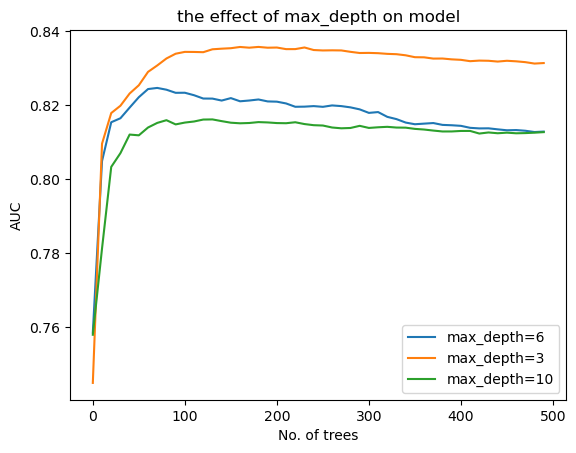

In [56]:
#now tune max_depth, the defult value is 6 so we can try 3 an 10 as other values
xgbparams['max_depth']=6
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='max_depth=6')
xgbparams['max_depth']=3
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='max_depth=3')
xgbparams['max_depth']=10
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='max_depth=10')
plt.title('the effect of max_depth on model')
plt.xlabel('No. of trees')
plt.ylabel('AUC')
plt.legend()
plt.show()


[0]	train-auc:0.76838	val-auc:0.74483
[499]	train-auc:0.93007	val-auc:0.83693
[0]	train-auc:0.76784	val-auc:0.73051
[499]	train-auc:0.90621	val-auc:0.83997
[0]	train-auc:0.76838	val-auc:0.74483
[499]	train-auc:0.94395	val-auc:0.83130


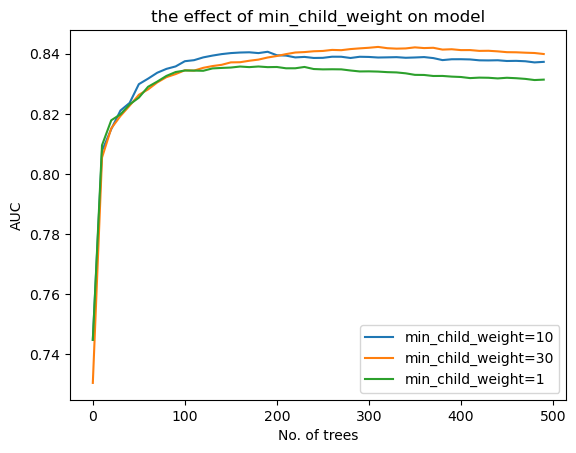

In [57]:
#here we see the best value for depth is 3
#now tune min_child_weight
xgbparams['max_depth']=3
xgbparams['min_child_weight']=10
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='min_child_weight=10')

xgbparams['min_child_weight']=30
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='min_child_weight=30')

xgbparams['min_child_weight']=1
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=500,evals= watchlist,evals_result= save)
plt.plot(num_trees, save['val']['auc'][::10],label ='min_child_weight=1')

plt.title('the effect of min_child_weight on model')
plt.xlabel('No. of trees')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [58]:
# there is no more difference so we will go with default value that is 1
#so final parameters are 
xgbparams = {
    'eta': 0.05,
    'max_depth':3,
    'min_child_weight': 1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity': 1
}

In [59]:
# still have to selected no. of trees
model= xgb.train(xgbparams, dtrain, num_boost_round= 500, verbose_eval=10, evals= watchlist,evals_result= save)

[0]	train-auc:0.76838	val-auc:0.74483
[10]	train-auc:0.82666	val-auc:0.80956
[20]	train-auc:0.84490	val-auc:0.81784
[30]	train-auc:0.85574	val-auc:0.81982
[40]	train-auc:0.86535	val-auc:0.82313
[50]	train-auc:0.87262	val-auc:0.82537
[60]	train-auc:0.87826	val-auc:0.82899
[70]	train-auc:0.88276	val-auc:0.83072
[80]	train-auc:0.88709	val-auc:0.83261
[90]	train-auc:0.89053	val-auc:0.83390
[100]	train-auc:0.89336	val-auc:0.83440
[110]	train-auc:0.89601	val-auc:0.83437
[120]	train-auc:0.89825	val-auc:0.83431
[130]	train-auc:0.90095	val-auc:0.83510
[140]	train-auc:0.90354	val-auc:0.83526
[150]	train-auc:0.90569	val-auc:0.83539
[160]	train-auc:0.90781	val-auc:0.83572
[170]	train-auc:0.90962	val-auc:0.83553
[180]	train-auc:0.91129	val-auc:0.83574
[190]	train-auc:0.91294	val-auc:0.83552
[200]	train-auc:0.91456	val-auc:0.83557
[210]	train-auc:0.91572	val-auc:0.83514
[220]	train-auc:0.91726	val-auc:0.83515
[230]	train-auc:0.91851	val-auc:0.83558
[240]	train-auc:0.91984	val-auc:0.83490
[250]	train

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


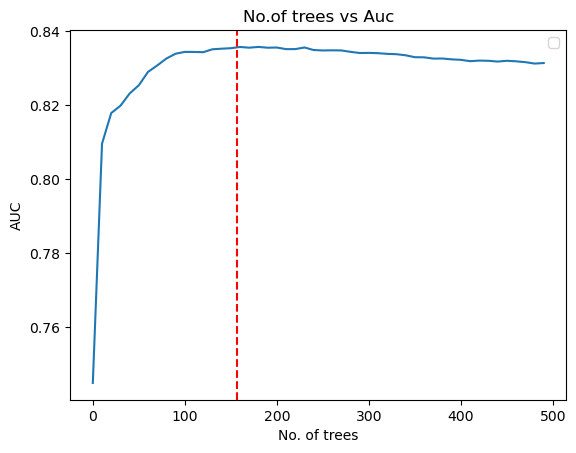

In [60]:
plt.plot(num_trees, save['val']['auc'][::10])
plt.axvline(x=save['val']['auc'].index(max(save['val']['auc'])), linestyle='dashed',color= 'red')
plt.title('No.of trees vs Auc')
plt.xlabel('No. of trees')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [61]:
#max auc score is for no. of trees=150
#now train our model finally
model= xgb.train(xgbparams, dtrain, num_boost_round= 150, evals= watchlist,evals_result= save)

[0]	train-auc:0.76838	val-auc:0.74483
[1]	train-auc:0.77896	val-auc:0.75495
[2]	train-auc:0.78658	val-auc:0.76133
[3]	train-auc:0.79182	val-auc:0.77864
[4]	train-auc:0.80028	val-auc:0.78609
[5]	train-auc:0.80635	val-auc:0.79395
[6]	train-auc:0.81237	val-auc:0.79866
[7]	train-auc:0.81415	val-auc:0.80079
[8]	train-auc:0.81941	val-auc:0.80607
[9]	train-auc:0.82663	val-auc:0.80599
[10]	train-auc:0.82666	val-auc:0.80956
[11]	train-auc:0.82972	val-auc:0.81127
[12]	train-auc:0.83053	val-auc:0.81195
[13]	train-auc:0.83475	val-auc:0.81111
[14]	train-auc:0.83681	val-auc:0.81305
[15]	train-auc:0.83909	val-auc:0.81563
[16]	train-auc:0.84085	val-auc:0.81385
[17]	train-auc:0.84101	val-auc:0.81634
[18]	train-auc:0.84152	val-auc:0.81764
[19]	train-auc:0.84317	val-auc:0.81812
[20]	train-auc:0.84490	val-auc:0.81784
[21]	train-auc:0.84735	val-auc:0.81752
[22]	train-auc:0.84822	val-auc:0.81790
[23]	train-auc:0.84873	val-auc:0.81680
[24]	train-auc:0.85154	val-auc:0.81787
[25]	train-auc:0.85186	val-auc:0.81

In [62]:
y_test = (data_test.status == 'default').values
del(data_test['status'])

In [63]:
data_test= data_test.fillna(0)
test_dict = data_test.to_dict('records')

In [64]:
x_test = dv.transform(test_dict)
x_test[0]

array([3.900e+01, 1.000e+03, 3.000e+03, 0.000e+00, 4.500e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       9.500e+01, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.058e+03, 0.000e+00, 1.000e+00, 1.000e+01, 6.000e+01])

In [65]:
y_pred = dt.predict_proba(x_test)[:,1]
auc_dt = roc_auc_score(y_test, y_pred)
auc_dt

0.7862066697362362

In [66]:
y_pred = rf.predict_proba(x_test)[:,1]
auc_rf = roc_auc_score(y_test, y_pred)
auc_rf

0.8241070841281326

In [67]:
dtest = xgb.DMatrix(x_test, label=y_test, feature_names=dv.feature_names_)
y_pred = model.predict(dtest)
auc_model = roc_auc_score(y_test, y_pred)
print("AUC Score on Test Set:", auc_model)

AUC Score on Test Set: 0.830076300730119


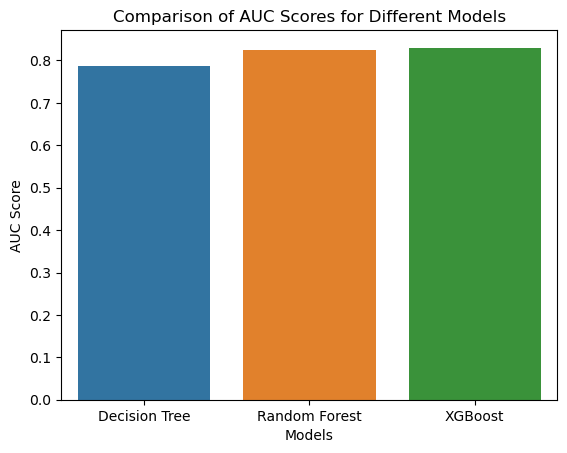

In [68]:
# Assuming auc_dt, auc_rf, auc_model are the AUC scores for Decision Tree, Random Forest, and XGBoost respectively
models = ['Decision Tree', 'Random Forest', 'XGBoost']
auc_scores = [auc_dt, auc_rf, auc_model]

# Create a DataFrame to pass to sns.barplot
data = {'Model': models, 'AUC Score': auc_scores}
df = pd.DataFrame(data)

# Create a bar plot
sns.barplot(x='Model', y='AUC Score', data=df)

# Set plot labels and title
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')

# Show the plot
plt.show()

<Axes: >

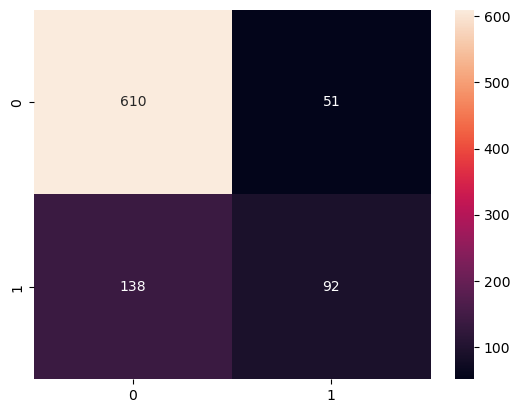

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score
y_predrfc = rf.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_predrfc), annot=True, fmt='.0f')

In [70]:
# best model is xgboost
#now lets save our model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    

In [71]:
import requests
person = {'age': 41,
         'amount': 1100,
         'assests':4000.0,
         'debt':30.0,
         'expenses':75,
         'income':80.0,
         'home':'private',
         'job':'partime',
         'marital':'married',
         'price':1409,
         'records':'no',
         'seniority': 1,
         'status':'default',
         'time':48}



In [72]:
!pip install flask

In [1]:
import flask
print(flask.__version__)

2.2.2


In [2]:
%%writefile app.py

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return 'Welcome to the model deployment page!'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Assuming data is a dictionary containing features for prediction
    # For example: data = {'age': 41, 'amount': 1100, ...}

    # Use the loaded model for prediction
    result = model.predict(data)

    # Return the result as JSON
    return jsonify({'prediction': result.tolist()})

if __name__ == '__main__':
    app.run(port=5000)  # Adjust the port number as needed

Writing app.py


In [3]:
import os
os.getcwd()

'C:\\Users\\Acer'